### Note: This is a demo to understand how to use COCO API, I'm leveraging official demo but add more comments on it
- Reference: https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocoDemo.ipynb

In [72]:
# load libraries
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (16.0,20.0)

In [114]:
# define the path where code can find *.json files
dataDir = 'data'
dataType = 'val2017'
annFile = '{}/annotations_trainval/instances_{}.json'.format(dataDir,dataType)
print("the defined path is: '", annFile, "'")

the defined path is: ' data/annotations_trainval/instances_val2017.json '


In [117]:
# initialize COCO apifor instance annotations
coco = COCO(annFile)
print('\n', 'coco is a defined object, type is ', type(coco))

loading annotations into memory...
Done (t=0.91s)
creating index...
index created!

 coco is a defined object, type is  <class 'pycocotools.coco.COCO'>


In [120]:
nms

{'accessory',
 'animal',
 'appliance',
 'electronic',
 'food',
 'furniture',
 'indoor',
 'kitchen',
 'outdoor',
 'person',
 'sports',
 'vehicle'}

In [124]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms = [cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

# display what categories are included 
print('\nComplete category structure is cats, shown below:')
cats

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
food indoor outdoor appliance person kitchen furniture sports accessory electronic vehicle animal

Complete category structure is cats, shown below:


[{'supercategory': 'person', 'id': 1, 'name': 'person'},
 {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'vehicle', 'id': 3, 'name': 'car'},
 {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'},
 {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'},
 {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'},
 {'supercategory': 'vehicle', 'id': 7, 'name': 'train'},
 {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'},
 {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'},
 {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'},
 {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'},
 {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'},
 {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'},
 {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'},
 {'supercategory': 'animal', 'id': 16, 'name': 'bird'},
 {'supercategory': 'animal', 'id': 17, 'name': 'cat'},
 {'supercategory': 'animal', 'id': 18, 'name': 'dog'},

In [39]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms = ['person','dog','skateboard'])
print('catIds = ', catIds)

imgIds = coco.getImgIds(catIds = catIds)
print('imgIds = ', imgIds)
imgIds = coco.getImgIds(imgIds = [324158])      # now assigned a specific ID to imgIds

img = coco.loadImgs(imgIds[np.random.randint(0, len(imgIds))])[0]
print('img = ', img)

catIds =  [1, 18, 41]
imgIds =  [549220, 324158, 279278]
img =  {'license': 1, 'file_name': '000000324158.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000324158.jpg', 'height': 334, 'width': 500, 'date_captured': '2013-11-19 23:54:06', 'flickr_url': 'http://farm1.staticflickr.com/169/417836491_5bf8762150_z.jpg', 'id': 324158}


img['coco_url'] =  http://images.cocodataset.org/val2017/000000324158.jpg


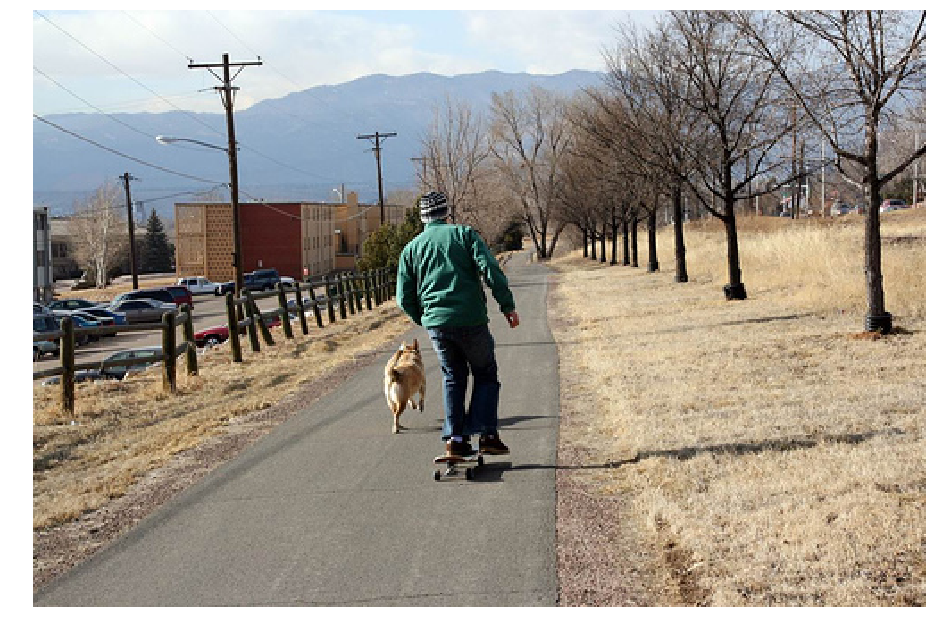

In [73]:
# load and display the image
# I = io.imread('%/images/%s/%s' %(dataDir, dataType, img['file_name']))
I = io.imread(img['coco_url'])
print("img['coco_url'] = ", img['coco_url'])

plt.axis('off')
plt.imshow(I)
plt.show()

imgIds =  [324158]
annIds =  [10673, 638724, 2162813]
shape of anns =  (3,) 

{'segmentation': [[216.7, 211.89, 216.16, 217.81, 215.89, 220.77, 215.89, 223.73, 217.77, 225.35, 219.12, 224.54, 219.12, 220.5, 219.66, 217.27, 219.93, 212.7, 220.46, 207.85, 219.66, 203.01, 218.85, 198.43, 217.77, 195.74, 216.7, 194.93, 215.62, 190.62, 215.62, 186.59, 214.27, 183.89, 211.85, 184.16, 211.85, 187.66, 210.24, 187.66, 209.16, 184.97, 207.81, 183.36, 205.12, 186.59, 205.12, 189.28, 201.08, 192.78, 199.74, 195.2, 196.78, 200.04, 196.51, 203.01, 198.12, 205.43, 197.32, 209.2, 196.78, 213.23, 197.05, 218.89, 199.74, 221.85, 201.62, 225.35, 201.62, 233.69, 201.08, 236.11, 202.97, 236.38, 204.85, 236.11, 204.58, 232.34, 203.78, 228.85, 205.39, 233.15, 207.81, 235.57, 208.62, 234.23, 206.74, 231.27, 205.12, 228.04, 206.74, 222.39, 208.35, 219.96, 210.77, 217.54, 211.85, 221.85, 214.54, 223.73, 212.93, 217.54, 212.93, 215.66, 215.89, 212.96, 216.16, 212.16]], 'area': 759.3375500000002, 'iscrowd': 0, 'i

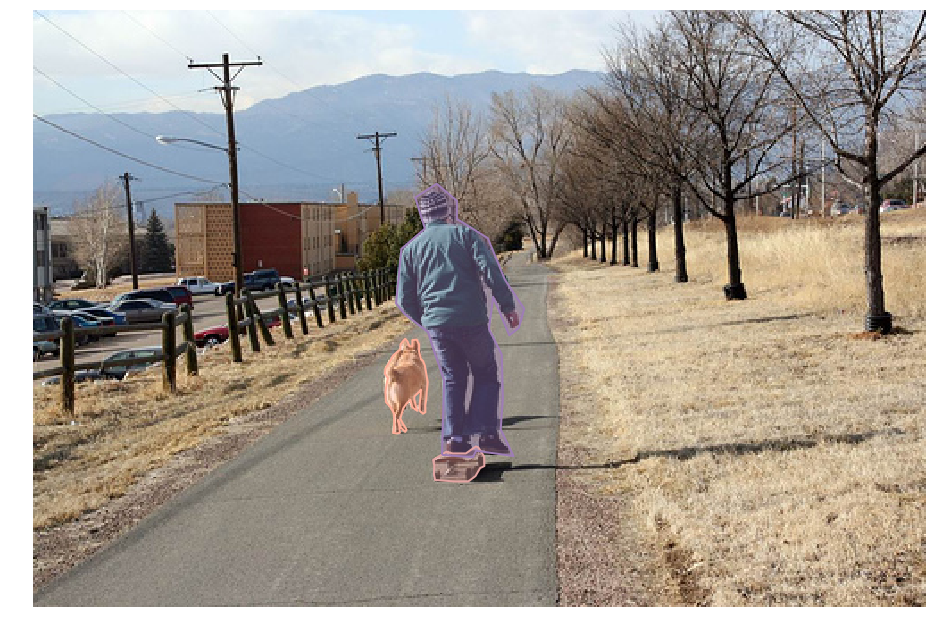

In [125]:
# load and display instance annotations
plt.imshow(I)
plt.axis('off')

annIds = coco.getAnnIds(imgIds = img['id'], catIds = catIds, iscrowd = None)
print('imgIds = ', imgIds)
print('annIds = ', annIds)

anns = coco.loadAnns(annIds)
print('shape of anns = ', np.shape(anns), '\n')
print(anns[0], '\n')
print(anns[1], '\n')
print(anns[2], '\n')

coco.showAnns(anns)

In [107]:
# initialize COCO api for person keypoints annotations
annFile = '{}/annotations_trainval/person_keypoints_{}.json'.format(dataDir, dataType)
print(type(annFile), "annFile = '", annFile, "'", '\n')

coco_kps = COCO(annFile)

<class 'str'> annFile = ' data/annotations_trainval/person_keypoints_val2017.json ' 

loading annotations into memory...
Done (t=0.65s)
creating index...
index created!


imgIds =  [324158]
catIds =  [1, 18, 41]
annIds =  [2162813] 

list anns =  [{'segmentation': [[228.43, 247.9, 229.63, 206.62, 224.24, 191.07, 220.65, 179.7, 207.49, 169.53, 202.71, 163.55, 205.7, 133.04, 218.86, 121.68, 213.47, 104.33, 225.44, 96.55, 236.8, 106.12, 236.8, 116.29, 254.15, 127.06, 263.72, 150.39, 274.49, 166.54, 271.5, 177.31, 266.12, 181.5, 257.14, 159.96, 254.75, 177.91, 261.93, 192.27, 262.53, 216.79, 261.33, 234.14, 268.51, 249.1, 247.57, 246.11, 245.78, 249.69, 229.03, 248.5]], 'num_keypoints': 12, 'area': 5999.5445, 'iscrowd': 0, 'keypoints': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 212, 135, 2, 241, 125, 2, 209, 162, 2, 257, 146, 2, 218, 172, 2, 267, 167, 2, 225, 177, 2, 247, 176, 2, 235, 203, 2, 254, 204, 2, 236, 240, 2, 254, 238, 2], 'image_id': 324158, 'bbox': [202.71, 96.55, 71.78, 153.14], 'category_id': 1, 'id': 2162813}] 



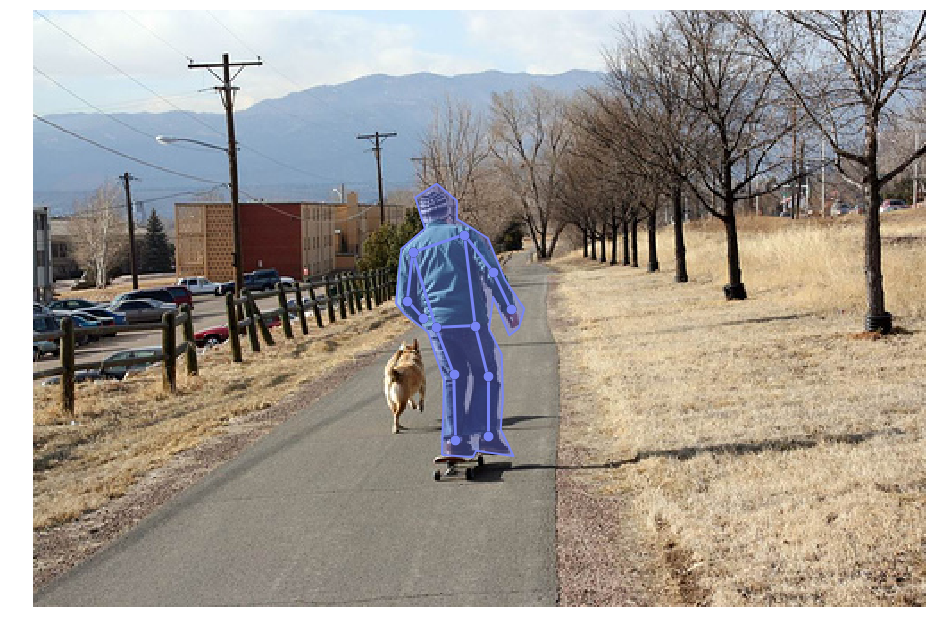

In [129]:
# load and display keypoints annotations
plt.imshow(I)
plt.axis('off')

ax = plt.gca()    # get the current polar axes on the current figure
annIds = coco_kps.getAnnIds(imgIds = img['id'], catIds = catIds, iscrowd = None)
print('imgIds = ', imgIds)
print('catIds = ', catIds)
print('annIds = ', annIds, '\n')

anns = coco_kps.loadAnns(annIds)
print('list anns = ', anns, '\n')
coco_kps.showAnns(anns)

In [130]:
# initialize COCO api for caption annotations
annFile = '{}/annotations_trainval/captions_{}.json'.format(dataDir, dataType)
print(type(annFile), "annFile = '", annFile, "'", '\n')

coco_caps = COCO(annFile)

<class 'str'> annFile = ' data/annotations_trainval/captions_val2017.json ' 

loading annotations into memory...
Done (t=0.05s)
creating index...
index created!


In [139]:
np.shape(anns)
print(anns[0])

{'image_id': 324158, 'id': 310079, 'caption': 'A man is skate boarding down a path and a dog is running by his side.'}


annIds =  [310079, 311105, 311588, 312677, 312860]
shape of anns =  (5,)
anns[0] =  {'image_id': 324158, 'id': 310079, 'caption': 'A man is skate boarding down a path and a dog is running by his side.'}
anns[1] =  {'image_id': 324158, 'id': 311105, 'caption': 'A man on a skateboard with a dog outside. '}
anns[2] =  {'image_id': 324158, 'id': 311588, 'caption': 'A person riding a skate board with a dog following beside.'}
anns[3] =  {'image_id': 324158, 'id': 312677, 'caption': 'This man is riding a skateboard behind a dog.'}
anns[4] =  {'image_id': 324158, 'id': 312860, 'caption': 'A man walking his dog on a quiet country road.'} 

A man is skate boarding down a path and a dog is running by his side.
A man on a skateboard with a dog outside. 
A person riding a skate board with a dog following beside.
This man is riding a skateboard behind a dog.
A man walking his dog on a quiet country road.


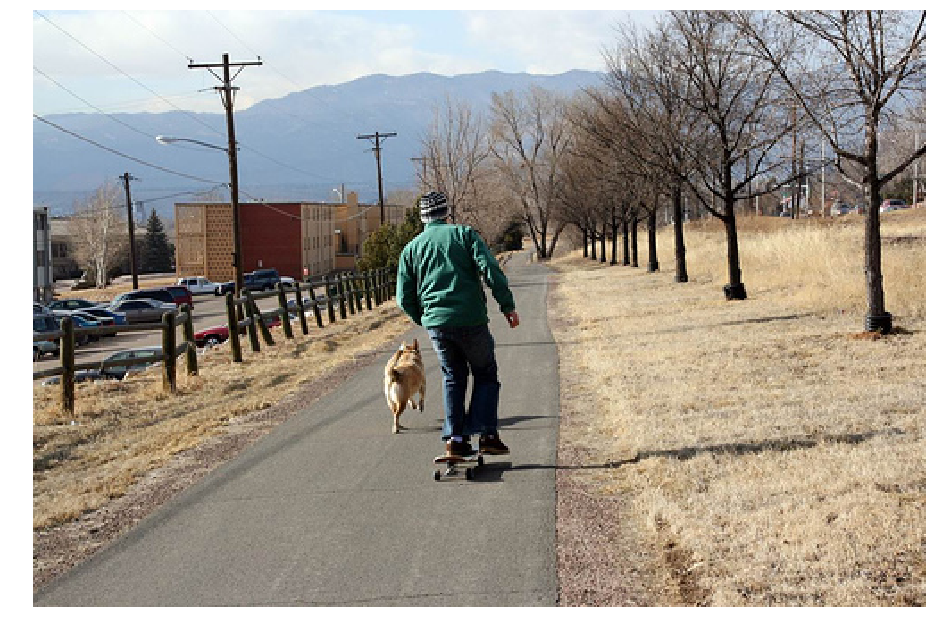

In [142]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds = img['id'])
print('annIds = ', annIds)

anns = coco_caps.loadAnns(annIds)
print('shape of anns = ', np.shape(anns))
print('anns[0] = ', anns[0])
print('anns[1] = ', anns[1])
print('anns[2] = ', anns[2])
print('anns[3] = ', anns[3])
print('anns[4] = ', anns[4], '\n')

coco_caps.showAnns(anns)
plt.imshow(I)
plt.axis('off')
plt.show()

### the end 